# Problem set #3 PHY256 

### Problem 1.   Baker map's strange attractor is a fractal. Precision required.

The Baker map is a prototype for 2D chaotic dynamical systems.
The Baker map is an example of a map that has been used for encryption of images.  The map takes a point on the unit square and returns a new point on the unit square.

For parameter $0 < c \le 1/2$ and
on the unit square, $x \in [0,1]$ and $y \in [0,1]$,

\begin{equation*}
(x_{n+1},y_{n+1}) =
\begin{cases}
(c x_n, 2 y_n)  & \text{for  } y_n \le 1/2 \\
(1 + c(x_n -1), 1 + 2(y_n - 1)) & \text{otherwise}
\end{cases}
\end{equation*}

<img src="baker.png">

For $c=1/2$ the map is area preserving, and the red and blue rectangles on the right touch each other. If $c<1/2$  a distribution of
points covers a smaller and smaller region as the map is iterated.
The area covered shrinks.

Looking at the $y$ part of the map alone,  
$$y^{n+1} = (2 y^n)\ {\rm mod\ 1}$$  

This is a shift map!  In base 2, the map shifts a number by 1 digit!

Below I show a code that plots a few thousand iterations of the map for $c=1/3$.

Like the logitistic map, the Baker map has fixed points and periodic points.  

If the initial condition is <b> irrational </b> and $c<1/2$, then 
as the map is iterated, the orbit converges to a set of points that is a fractal and is called a strange attractor.  An <b> attractor </b> is a set of numerical values toward which a system tends to evolve, for a wide variety of starting conditions of the system.
An attractor is called <b> strange </b> if it has a fractal structure
and no volume. 

If a strange attractor is <b> chaotic </b> if it exhibits sensitive dependence on initial conditions. Then any two arbitrarily close but non-identical initial points on the attractor, after a number of iterations, will give two points that are arbitrarily far apart (subject to the confines of the attractor), and after another number of iterations, will give two points that are arbitrarily close together. A dynamic system with a chaotic strange attractor is locally unstable yet globally stable: once an orbit enters the attractor, nearby points diverge from one another but never depart from the attractor.

At the end of the code below there are three commented out statements that you can edit so you can replot the image to blow up and look at small regions of the plot. Uncomment these and chose and assign values for *fac* and *power*.  Power should be an integer 1, 2 or 3 ..
Each power refers to how many times you zoom in.

* win=1.0/fac**power
* plt.xlim([0,win])
* plt.ylim([0,win])

1. If you choose the number *fac* correctly when you replot the output (zooming in) you will see a figure that looks similar to the original figure.  What value of *fac* do you need to do this? 

You may need to plot more points to see a zoomed in plot similar to the original.   When you zoom in and see the same type of shape, we say that the structure is <b> fractal</b>.  The map has scale invariant structure. Fractals are infinitely self-similar.

2. Locate the commented line  

```
 getcontext().prec = 20  # number of digits of precision
```

Uncomment the getcontext line and change the precision of the calculation.

I have used the Decimal package so that the precision of the calculation can be adjusted.

https://docs.python.org/3/library/decimal.html


What happens as you reduce the precision?  At what number of digits to you start to see a difference in your plot?  If you start to see fewer points, then the orbit has converged onto a periodic orbit or fixed point, and this might be due to low precision.  That means you need higher precision to see the true behavior of the map.

3.  Adjust the initial condition.  How does this affect the plot of the iterates?

On the Baker map:
https://en.wikipedia.org/wiki/Baker%27s_map

Also see an introduction to the Horseshoe map 
https://en.wikipedia.org/wiki/Horseshoe_map

I found the number of digits required to see a difference in the point distributions was quite dependent upon the initial condition.


In [1]:
#Baker map example using the decimal package to increase precision of computations
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#%config InlineBackend.figure_format = 'retina'  # try this to improve resolution of figures
# comment out this line if your laptop does not have a retina display

# I increase precision by using the Decimal package
# See https://docs.python.org/2/library/decimal.html
from decimal import *
 
# you can change number of digits of precision here
#getcontext().prec =28  
print ("digits of precision ", getcontext().prec) # number of digits of precision
getcontext().prec = 30

# global variables needed in Baker map routine
d2 = Decimal(2)  # using package Decimal we need to give constants 2, 1 
d1 = Decimal(1)
dhalf = d1/d2  # should be a Decimal equal to 1/2

# Baker map function returns x,y 
# The map has coefficient c which should be in 0<c<=1/2
# this routine will not work if you pass it combinations of regular numbers and Decimals, 
# We will be only passing Decimals
# Here d1 and d2 are global variables defined above
def baker(x,y,c):
        xout = d1 + c*(x-d1)  # using decimal constants 
        yout = d1 + d2*(y-d1)  #d1=Decimal(1), d2 = Decimal(2)
        if (y<=dhalf):
                xout=c*x
                yout=d2*y

        #print(xout,yout) # for testing
        return xout,yout  # return new point
    
# returns: two vectors x,y points of nit iterations of the Baker map
# arguments:
#   xi,yi are initial conditions
#   c is coefficient for the Baker map
#   nit number of iterations
# I am assuming that all numbers are Decimal objects
def vecbaker(xi,yi,c,nit):
    xout =np.array([xi])  # create an array with initial conditions
    yout =np.array([yi])
    x=xi  # initial conditions
    y=yi
    for i in range(nit):
        x,y  = baker(x,y,c)  # compute next point from current point
        xout=np.append(xout,x)  # append to arrays
        yout=np.append(yout,y)
        
    return xout,yout  # return 2 arrays with nit iterations of the map in them

c=d1/Decimal(3)  # map parameter, with c<1/2 we can have a strange attractor
x0=dhalf # initial condition
y0=Decimal(2).sqrt()/Decimal(2) #initial condition is chosen to be irrational!
print("initial condition:(",x0,",",y0,")")
# irrational initial condition is required for non-periodic behavior

nit=10000  # numbers of iterations for the map

xv,yv = vecbaker(x0,y0,c,nit) # get some vectors of stuff to plot 
# the computation is done here!!!
# xv,yv should now be vectors of points for nit iterations


digits of precision  28
initial condition:( 0.5 , 0.707106781186547524400844362105 )


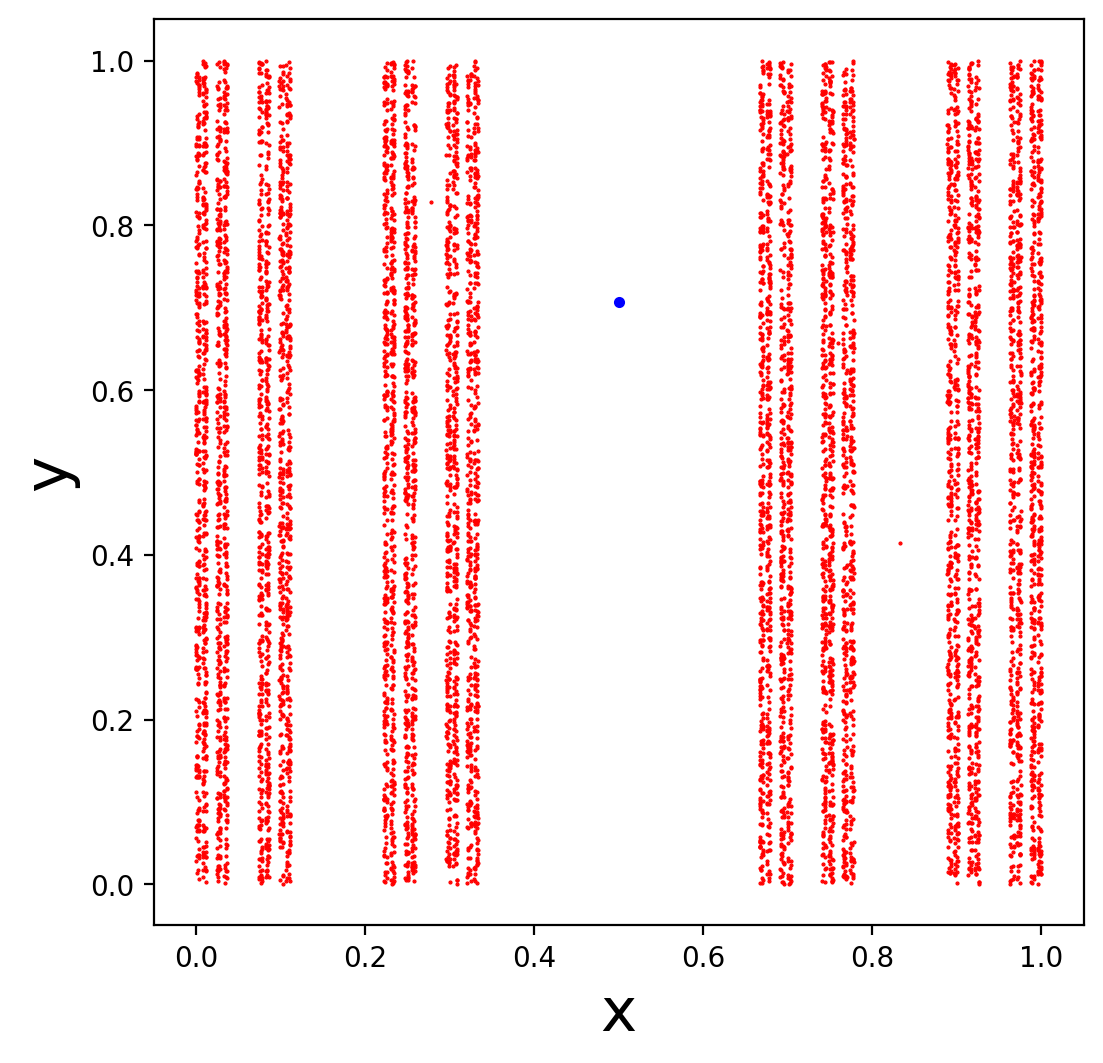

In [2]:
plt.figure(figsize=(6,6), dpi=200)
plt.xlabel("x", fontsize=22)
plt.ylabel("y", fontsize=22)
plt.plot(xv,yv,'r.', ms=1) # plot the iterations of the map
plt.plot(xv[0],yv[0],'bo', ms=3); # plot thte initial condition

# uncomment to rescale plotting range, first you need to assign fac and power
# fac =  ?  # (bigger than 1) something like 2 or 3 or 4 or 2.5 or something like that
# power = ? # (1 or 2 or 3)
#win=1.0/fac**power
#plt.xlim([0,win])  # adjust plotting limits
#plt.ylim([0,win])


### Problem 2.   Baker map's Lyapunov exponent

A symptom of chaotic behavior is exponential divergence of nearby trajectories.  In other words the orbits are extremely sensitive to initial conditions.
The maximum Lyapunov exponent describes how fast nearby trajectories diverge.  In a dynamical system this gives a timescale for how fast information of the initial conditions is lost.

We can record trajectories with two different initial conditions, where the two different initial positions are very close together, only separated by a small distance of $\epsilon$.  
We can chose $\epsilon$ to be near the precision limit.  For example, $\epsilon =$ 1E-41 if our numbers of digits of precision is set to 42.  

1. Using the Baker map, compute two sets of vectors 
\begin{align}
(x^i, y^i) &= {\bf f}^i(x_0,y_0) \\
(x_*^i, y_*^i) &=  {\bf f}^i(x_0,y_0 + \epsilon)
\end{align}
for $i \in [0,100]$ (you can increase the range later on).

Here ${\bf f}^i()$ is the function applied $i$ times.  It's the same function for both orbits.
The two orbits have different initial conditions.

Altogether you need to make 4 arrays, two containing iterates $x^i,y^i$ for initial condition $x_0,y_0$ and two arrays containing
the iterates $x_*^i,y_*^i$ for the initial condition $x_0,y_0 + \epsilon$.

The first value in the $x$-array can be $x$ that you get if you apply the function 1 time,  the second value in the array the $x$ you get when you apply the function 2 times, etc..  And the same for the $y$ array, and similarly for the $x_*$ and $y_*$ arrays but using the other initial condition.



2. Compute the distance between each pair of iterates
$$
d^i = \sqrt{(x^i - x_*^i)^2 + (y^i - y_*^i)^2} 
$$
It is useful to make an array of these distances, $d^i$ values.   

If the difference depends exponentially on the number of steps then 
$$ d^i = d_0 e^{\lambda i}$$
where $d_0$ is the distance between the initial conditions.
Taking the natural log of this equation
$$ \ln d^i = \ln d_0 + \lambda i $$
When the two trajectories  diverge exponentialy, a plot of 
 $\ln d^i$ vs $i$ should give points along a line.  The slope, $\lambda$ is known as the Lyapunov exponent.

Ideally the maximum Lyapunov exponent
$$ \lambda = \lim_{i \to \infty} \frac{1}{i} \log \left| \frac{d_i}{d_0} \right|$$
It's a *maximum* exponent because the system has two dimensions and the map causes trajectories to diverge or stretch in one direction.

3. Make a plot of $\log d^i$ vs $i$.  While the idea is to take the limit to infinity, in practice if $i$ is too large,  the distance levels off because the difference between trajectories reaches the boundary of the unit square.  So you need to compute the exponent from the region in the plot where the slope is linear.

4. Use your plot to estimate the Lypunov exponent $\lambda$.

The Lyapunov exponent for the Baker map is $\ln 2$.  How close is your measured exponent to that value?  

Notes:  Assuming you are working with the code from the previous problem, 
everytime you do arithmetic with a constant it must be a decimal.

*np.log()* doesn't work on Decimal arrays but *np.log10()* does work on Decimal arrays.

*d1.ln()* works on a decimal number variable d1.

If you increase the number of iterations you should see your plot level off where the log is near zero corresponding to the difference being as large as the unit interval (it can't get any larger than that!)  The Baker map gives well behaved exponential divergence, and using the Decimal package, I find I can directly measure the Lyapunov exponent over a really large range.  Usually one is working at lower levels of precision and cannot directly measure the exponent over such a large range. And that leads to different strategies for computing a Lyapunov exponent, a Lyapunov time or a related type of indicator.

In [3]:
d1

Decimal('1')

In [4]:
np.log10(d1)

Decimal('0')

In [5]:
np.log(d1)   # fails as of 2021, just so you know you can't use this!

TypeError: loop of ufunc does not support argument 0 of type decimal.Decimal which has no callable log method

In [6]:
d1.ln() # works! use this instead of np.log()

Decimal('0')